In [2]:
%autosave 2
%load_ext autoreload
%autoreload 2
%matplotlib inline

Autosaving every 2 seconds


# Analíse de reviews de videogames da Amazon

## Referencias
- [NLTK Book Online](http://www.nltk.org/book/)

* __Turing Talks__
    - [Introdução a NLTK com Dom Casmurro](https://medium.com/turing-talks/uma-an%C3%A1lise-de-dom-casmurro-com-nltk-343d72dd47a7)
    - [Introdução ao Processamento de Linguagem Natural com Baco Exu do Blues
](https://medium.com/turing-talks/introdu%C3%A7%C3%A3o-ao-processamento-de-linguagem-natural-com-baco-exu-do-blues-17cbb7404258)
    - [Introdução a Bag of Words e TF-IDF](https://medium.com/turing-talks/introdu%C3%A7%C3%A3o-a-bag-of-words-e-tf-idf-43a128151ce9)
        - [notebook](https://github.com/turing-usp/BoW-e-TFIDF/blob/master/BoW_e_TFIDF.ipynb)
    - [Sua primeira análise de sentimentos com scikit-learn](https://medium.com/turing-talks/sua-primeira-an%C3%A1lise-de-sentimentos-com-scikit-learn-a47c088ea7bd)
        - [modelos](https://www.kaggle.com/camillafonseca/nlp-an-lise-de-sentimento-do-olist-para-iniciantes#Modelos)
    - [Como Avaliar Seu Modelo de Classificação](https://medium.com/turing-talks/como-avaliar-seu-modelo-de-classifica%C3%A7%C3%A3o-acd2a03690e)
    

* __Libs__
    - [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer)
        - [Sparse matrix](https://en.wikipedia.org/wiki/Sparse_matrix)
    - [TfidfTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html)
    - [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)
    - [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

In [3]:
from rich import print # print ficar bonitinho
from IPython.display import display

In [4]:
import pandas as pd
import numpy as np

In [5]:
import nltk
from nltk.corpus import stopwords # remover stopwords
from nltk import WordNetLemmatizer
from nltk.probability import FreqDist
import string, re # remover pontucao
from sklearn.feature_extraction.text import TfidfVectorizer # TF-IDF
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [6]:
#nltk.download()

In [41]:
from matplotlib import pyplot as plt
from matplotlib import gridspec
from matplotlib.ticker import PercentFormatter
import matplotlib as mpl
import seaborn as sns

In [8]:
plt.style.use('ggplot')

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : '16'}

mpl.rc('font', **font)

In [9]:
from wordcloud import WordCloud
import cv2 as cv # Pra mascara do wordcloud

In [10]:
dfReview = pd.read_csv('video_games_reviews_train.csv')

## Pré-processamento e Análise do corpus

### Visualizacao dos dataset e limpeza

In [11]:
dfReview.head(10)

,level_0,index,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,9604,222941,A1U1AK7HKB2BLN,B00CX6XKK6,jayfer,"[4, 51]",ive got to play this on both consoles now and ...,1,wasted 500 dollars on the xbox one.,1385078400,"11 22, 2013"
1,5428,106670,A1L1D50VH2AX7J,B0017UFWMS,Anjoyla,"[0, 0]",This game gives you a series of word puzzles t...,2,Margots Word Brain,1321833600,"11 21, 2011"
2,198,24455,A2JWU211CM0BYE,B00005RCR0,DCN2049,"[0, 1]",You should pretty much already know what this ...,4,"Excellent product, watch the discs",1360540800,"02 11, 2013"
3,6070,42574,A1DP3YZ2OQWAP4,B0000ARQMW,liz,"[0, 0]",I really like this game i love all the challen...,5,Jammin banging game,1383436800,"11 3, 2013"
4,11616,172598,A48Z207T98FN0,B004HYK8Y8,The Reverend,"[296, 368]",*** please read the 12/9/11 update below this ...,1,Consumers are NOT Beta-Testers !!! (updated),1322784000,"12 2, 2011"
5,9852,214525,A0815906MFVDTIFHGRQR,B00ATF5YY8,Diego B.,"[0, 0]","At the beginning I though, &#34;Wow! this game...",3,"Ok game, kinda bad story.",1374796800,"07 26, 2013"
6,11832,62284,A1OJXGNKA0QGUW,B000B6OBPS,J. Woods,"[1, 2]","Honestly I think this is pretty bad, and let m...",1,Don't believe the hype..,1333670400,"04 6, 2012"
7,838,80635,A2SP52NH44LRDS,B000MUW98O,Happy r/c,"[0, 3]",Try GRID racing game which I think is better.W...,2,Motorcycle doing wheelie can't flip backwards,1268956800,"03 19, 2010"
8,7485,167288,A1BBYSMT9YCODI,B0045EI7I4,korova,"[60, 67]",Long time fans of Grand Theft Auto know that e...,4,Rockstar's Rashomon,1288569600,"11 1, 2010"
9,2635,207739,A2TIP4NEY64PLK,B008DNUXA8,"Fun Times Mom ""Hayley""","[7, 9]",For the few minutes that my son played he had ...,1,RENT THIS ONE!!! IT COULDN'T KEEP A 6 YEAR OLD...,1355097600,"12 10, 2012"


In [12]:
dfReview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   level_0         8000 non-null   int64 
 1   index           8000 non-null   int64 
 2   reviewerID      8000 non-null   object
 3   asin            8000 non-null   object
 4   reviewerName    7916 non-null   object
 5   helpful         8000 non-null   object
 6   reviewText      7999 non-null   object
 7   overall         8000 non-null   int64 
 8   summary         8000 non-null   object
 9   unixReviewTime  8000 non-null   int64 
 10  reviewTime      8000 non-null   object
dtypes: int64(4), object(7)
memory usage: 687.6+ KB


* reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
* asin - ID of the product, e.g. 0000013714
* reviewerName - name of the reviewer
* helpful - helpfulness rating of the review, e.g. 2/3
* reviewText - text of the review
* overall - rating of the product
* summary - summary of the review
* unixReviewTime - time of the review (unix time)
* reviewTime - time of the review (raw)

[fonte](https://jmcauley.ucsd.edu/data/amazon/)

as colunas de interesse para o modelo sao: *reviewText* + *summary* como X e *overall* como y

In [17]:
# verificar se existem valores vazios nas colunas de interesse: reviewText, summary e overall: 

print('[bold red]NaN na coluna reviewText:[/bold red] ' + str(len(dfReview[dfReview['reviewText'].isna()])))
print('[bold red]NaN na coluna summary:[/bold red] ' + str(len(dfReview[dfReview['summary'].isna()])))
print('[bold red]NaN na coluna overall:[/bold red] ' + str(len(dfReview[dfReview['overall'].isna()])))

NaN na coluna reviewText: 1

NaN na coluna summary: 0

NaN na coluna overall: 0

Como só há valores NaN na coluna *reviewText*, ao unir com a a coluna *summary* formar um unico texto, nao vao mais haver NaN, portanto nao é nescessario excluir a respectiva linha

In [18]:
# unir as colunas reviewText e summary
dfReview['reviewText'] = dfReview.apply(lambda x: x.summary + ' ' + x.reviewText if str(x.reviewText) != 'nan' else x.summary, axis=1)

In [19]:
# removendo colunas desnecessarias:
dfReview.drop(['level_0', 'index', 'unixReviewTime', 
               'reviewerID', "reviewerName", "summary"], axis=1, inplace=True)

In [78]:
# convertendo reviewTime em datetime:
dfReview['reviewTime'] = pd.to_datetime(dfReview['reviewTime'], format='%m %d, %Y')

Como especificado no enunciad, deve-se fazer uma classificacao binaria, 0 para avaliacao menor ou igual a 3 e 1 para maiores, estao crio uma nova coluna binaria em funcao da *overall* mas nao deleto a original para algumas analises

In [20]:
# criar coluna binaria do overall 1 if nota > 3 else 0
dfReview['overallBinary'] = dfReview['overall'].apply(lambda x: 1 if x > 3 else 0)

In [23]:
print('[bold blue]Dataset limpo:[/bold blue]')
dfReview.head()

Dataset limpo:

,asin,helpful,reviewText,overall,reviewTime,overallBinary
0,B00CX6XKK6,"[4, 51]",wasted 500 dollars on the xbox one. ive got to...,1,"11 22, 2013",0
1,B0017UFWMS,"[0, 0]",Margots Word Brain This game gives you a serie...,2,"11 21, 2011",0
2,B00005RCR0,"[0, 1]","Excellent product, watch the discs You should ...",4,"02 11, 2013",1
3,B0000ARQMW,"[0, 0]",Jammin banging game I really like this game i ...,5,"11 3, 2013",1
4,B004HYK8Y8,"[296, 368]",Consumers are NOT Beta-Testers !!! (updated) *...,1,"12 2, 2011",0


### Remocao de stopwords e pontuacao

In [24]:
def tratamento_basico(texto,
                      pontuacao = re.compile('|'.join(map(re.escape, string.punctuation))),
                      stpwrds = stopwords.words('english')):
    """tratamento basico do texto com remocao de pontucao e e stopwords
    
    input:
         - texto: (str) -> menssagem a ser processada
         - pontuacao (re.Pattern) -> caracteres de pontuacao a serem removidos
                                     compilados em uma regex
                                     default: providos pelo string.punctuation
                                              usando o re.compile('|'.join(map(re.escape, string.punctuation)))
         - stpwrds (list)  -> lista de stopwords
                              default: providos pela funcao stopwords.words('english') da lib nltk.corpus
    output:
         (str) ->  menssagem pre-processada em caixa baixa
    """
    
    # Caixa baixa
    texto = texto.lower()
    
    # para pontucao so usar o metodo sub da regex de entrada
    texto = pontuacao.sub("", texto)
    
    # para as stopwords fazer por compreensao de lista, juntando chars em
    # palavras para nao remover as sopwords que estejam dentro de uma outra palavra
    # e usar os texto em caixa baixa para dar match
    texto = [palavra for palavra in texto.split() if palavra not in stpwrds]
    
    # Retorna vetor pra um texto
    texto = " ".join(texto)
    
    return texto

In [25]:
print('[bold red]antes do tratamento_basico():[/bold red]')
print()
dfReview['reviewText'].head(10)

antes do tratamento_basico():

0    wasted 500 dollars on the xbox one. ive got to...
1    Margots Word Brain This game gives you a serie...
2    Excellent product, watch the discs You should ...
3    Jammin banging game I really like this game i ...
4    Consumers are NOT Beta-Testers !!! (updated) *...
5    Ok game, kinda bad story. At the beginning I t...
6    Don't believe the hype.. Honestly I think this...
7    Motorcycle doing wheelie can't flip backwards ...
8    Rockstar's Rashomon Long time fans of Grand Th...
9    RENT THIS ONE!!! IT COULDN'T KEEP A 6 YEAR OLD...
Name: reviewText, dtype: object

In [26]:
print('[bold red]depois do tratamento_basico():[/bold red]')
print()

# remover os numeros tambem
# incluir a apalvra game nos stopwords
StopWords = stopwords.words('english')
StopWords.append('game')
StopWords.append('games')
dfReview['reviewText_prep'] = dfReview['reviewText'].apply(lambda x:(tratamento_basico(x, 
                                                                                       pontuacao=re.compile('|'.join(map(re.escape, string.punctuation+'1234567890'))),
                                                                                       stpwrds=StopWords)))
dfReview['reviewText_prep'].head(10)

depois do tratamento_basico():

0    wasted dollars xbox one ive got play consoles ...
1    margots word brain gives series word puzzles f...
2    excellent product watch discs pretty much alre...
3    jammin banging really like love challenges lov...
4    consumers betatesters updated please read upda...
5    ok kinda bad story beginning though wow looks ...
6    dont believe hype honestly think pretty bad le...
7    motorcycle wheelie cant flip backwards try gri...
8    rockstars rashomon long time fans grand theft ...
9    rent one couldnt keep year olds attention minu...
Name: reviewText_prep, dtype: object

In [32]:
#plt.figure(figsize=(20,9))
#gs = gridspec.GridSpec(2, 1)

#ax0 = plt.subplot(gs[0:1])
#ax1 = plt.subplot(gs[1:])

#p = dfReview['len_review_words'].plot(kind='box', ax=ax0, vert=False, )

### Lemmatização

In [29]:
lemmantizador = nltk.WordNetLemmatizer()

def lemmanizacao(texto):
    """retorna texto lemmantizado
    
    entrada:
        - texto(str): string a ser lemmantizada
    saida:
        - (str): texto de entrada lemmantizado
    """
    
    tokentxt =  [lemmantizador.lemmatize(palavra) for palavra in texto.split()]
    
    return ' '.join(tokentxt)

In [30]:
dfReview['reviewText_prep'] =  dfReview['reviewText_prep'].apply(lambda x:lemmanizacao(x))
dfReview['reviewText_prep']

0       wasted dollar xbox one ive got play console ho...
1       margots word brain give series word puzzle fig...
2       excellent product watch disc pretty much alrea...
3       jammin banging really like love challenge love...
4       consumer betatesters updated please read updat...
                              ...                        
7995    scrolling arrived mail promptly working great ...
7996    style substance perfect example style substanc...
7997    exceeds expectation let tell start im big yugi...
7998    good deal new delivers bought solely web swing...
7999    star ocean last hope international short revie...
Name: reviewText_prep, Length: 8000, dtype: object

### Analises

In [31]:
# adiciona coluna com quantidade de palavras e quantidade de caracteres
dfReview['len_review_words'] = dfReview['reviewText_prep'].apply(lambda x:len(x.split()))
dfReview['len_review_chars'] = dfReview['reviewText_prep'].apply(lambda x:len(x))

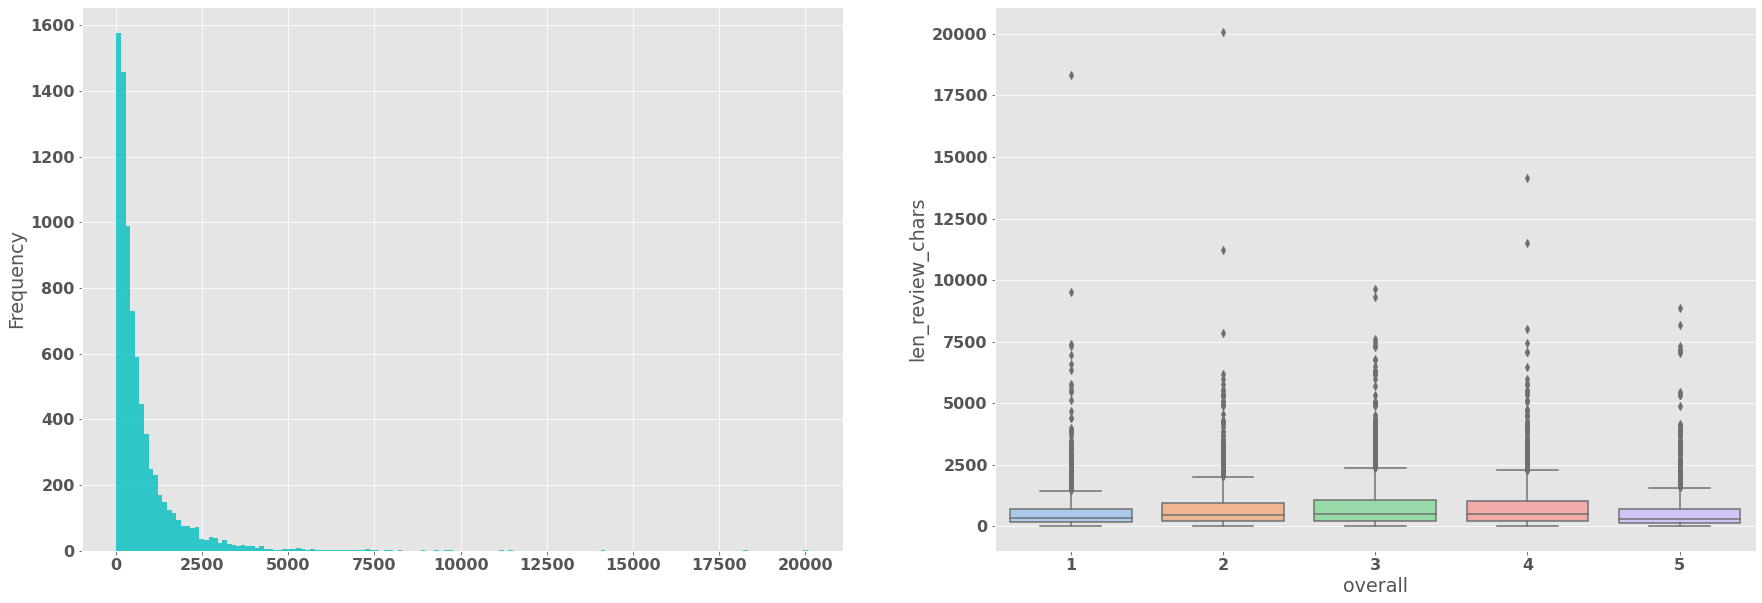

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10))
p = dfReview['len_review_chars'].plot(kind='hist', bins=150, ax=ax[0], alpha=.8, color='c', label='words')
p = sns.boxplot(data=dfReview, x='overall', y='len_review_chars', palette='pastel', ax=ax[1])

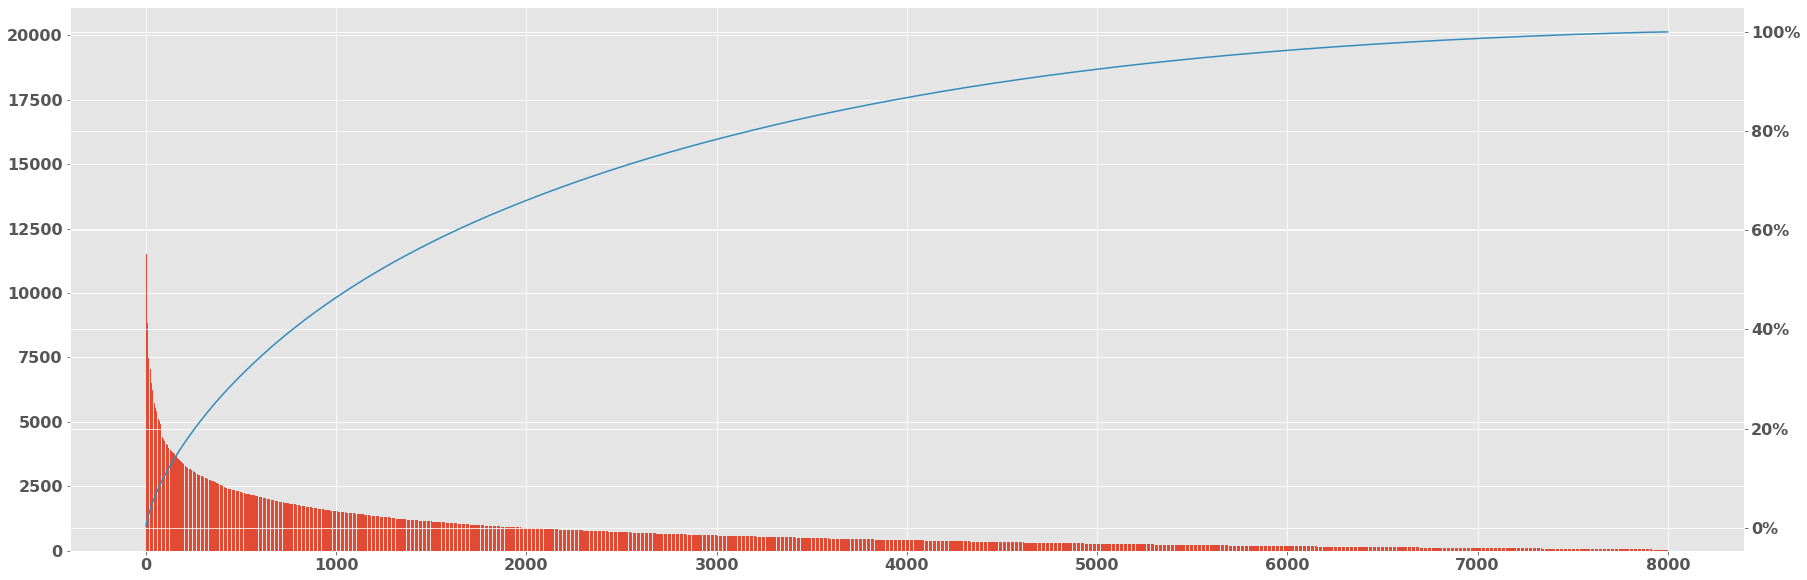

In [64]:
df = dfReview.sort_values(by='len_review_chars', ascending=False).reset_index()
df["cumpercentage"] = df["len_review_chars"].cumsum()/df["len_review_chars"].sum()*100

fig, ax = plt.subplots(figsize=(30, 10))
ax.bar(df.index, df["len_review_chars"], color="C0")
ax2 = ax.twinx()
ax2.plot(df.index, df["cumpercentage"], color="C1")
ax2.yaxis.set_major_formatter(PercentFormatter())

[]

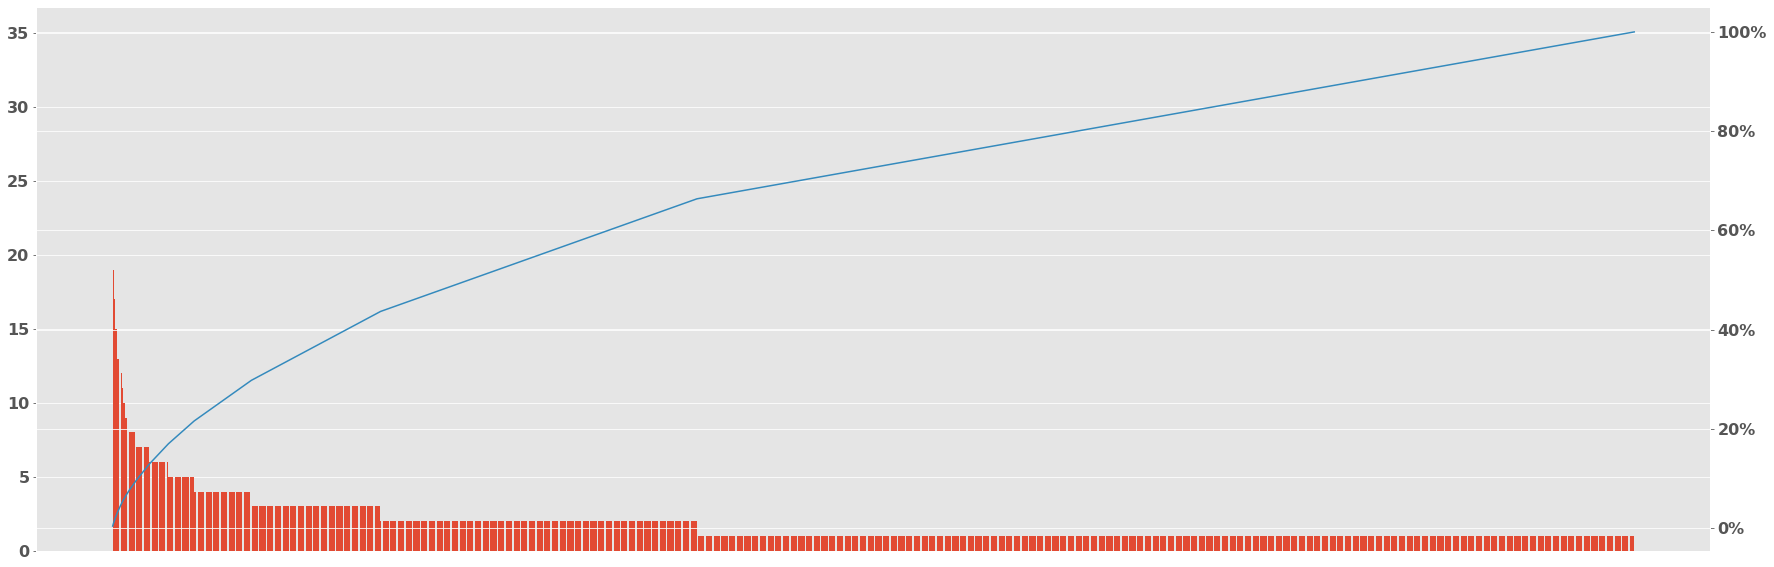

In [68]:
df = dfReview.groupby('asin').count().sort_values(by='helpful',ascending=False)[['reviewText']]
df["cumpercentage"] = df["reviewText"].cumsum()/df["reviewText"].sum()*100

fig, ax = plt.subplots(figsize=(30, 10))
ax.bar(df.index, df["reviewText"], color="C0")
ax2 = ax.twinx()
ax2.plot(df.index, df["cumpercentage"], color="C1")
ax2.yaxis.set_major_formatter(PercentFormatter())

ax2.axes.get_xaxis().set_ticks([])
ax.axes.get_xaxis().set_ticks([])

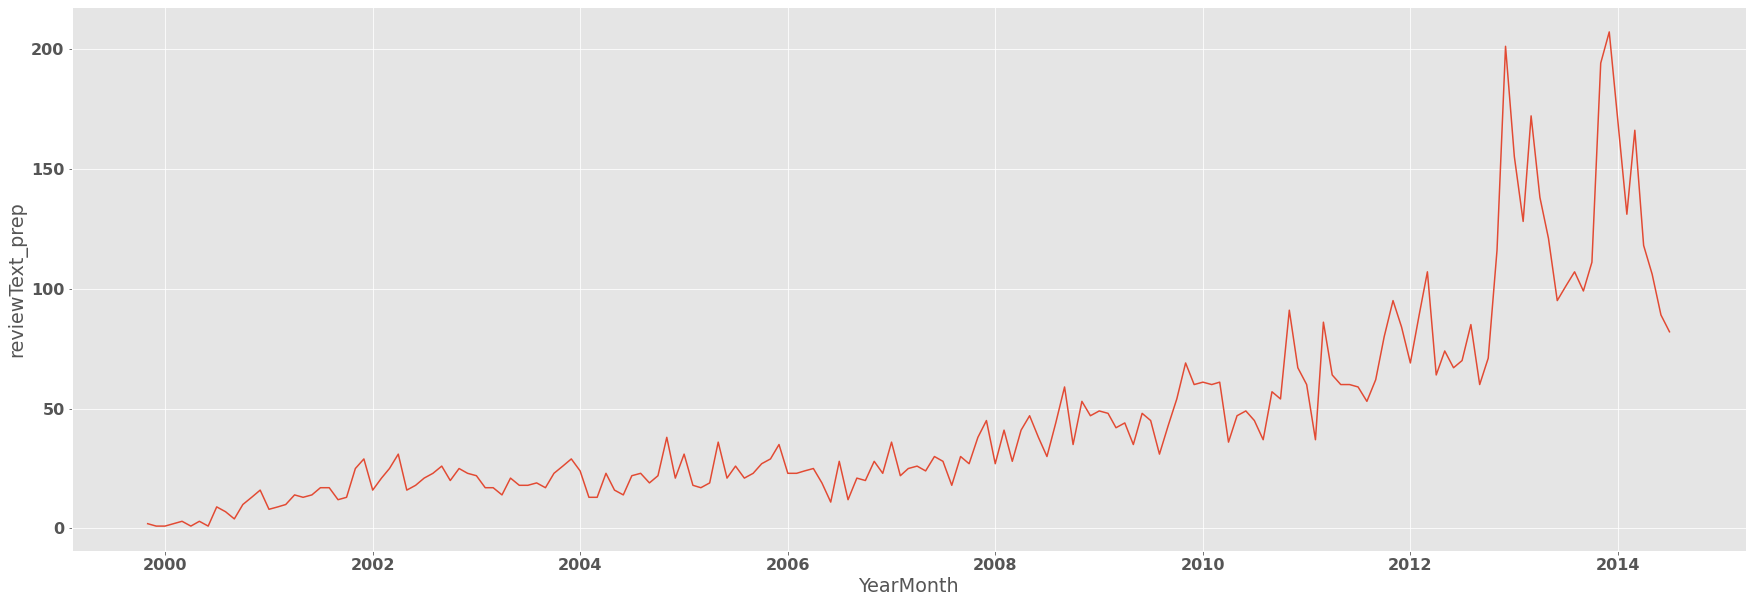

In [81]:
plt.figure(figsize=(30, 10))
dfReview['YearMonth'] = dfReview['reviewTime'].apply(lambda x:pd.to_datetime(str(x.year) + ' ' + str(x.month), format='%Y %m'))
p = sns.lineplot(data=dfReview.groupby('YearMonth').count().reset_index(),
                 x='YearMonth',
                 y='reviewText_prep',)

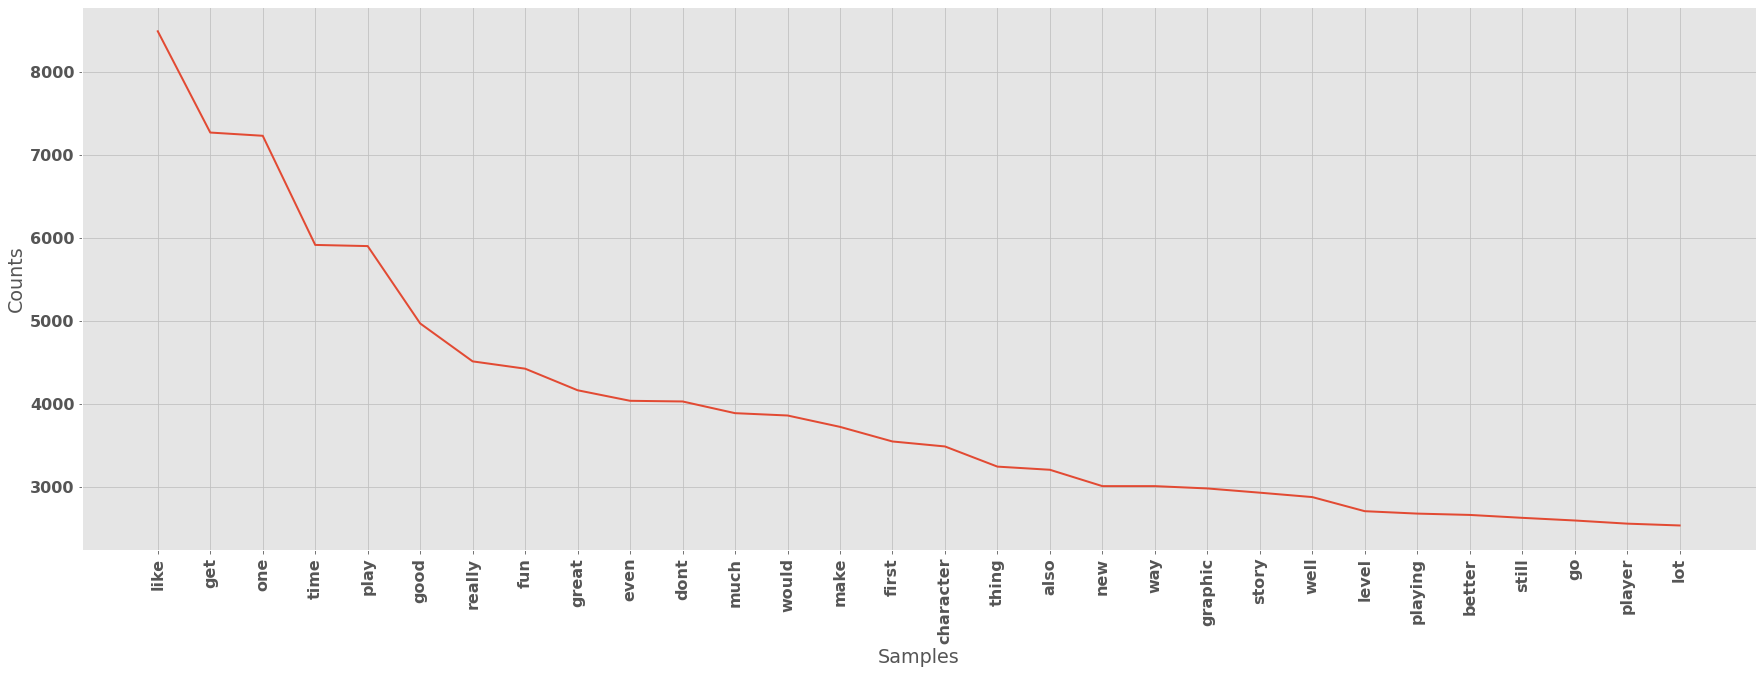

In [95]:
freq = FreqDist(text.split())
plt.figure(figsize=(30,10))
p = freq.plot(30,)

<font size="3">Esse "like" pode ser no sentido **i like it** ou associativo **its like a something** ...</font>

In [ ]:
ret, mask = cv.threshold(cv.imread('controller.png'),
                         55,
                         255,
                         cv.THRESH_BINARY)

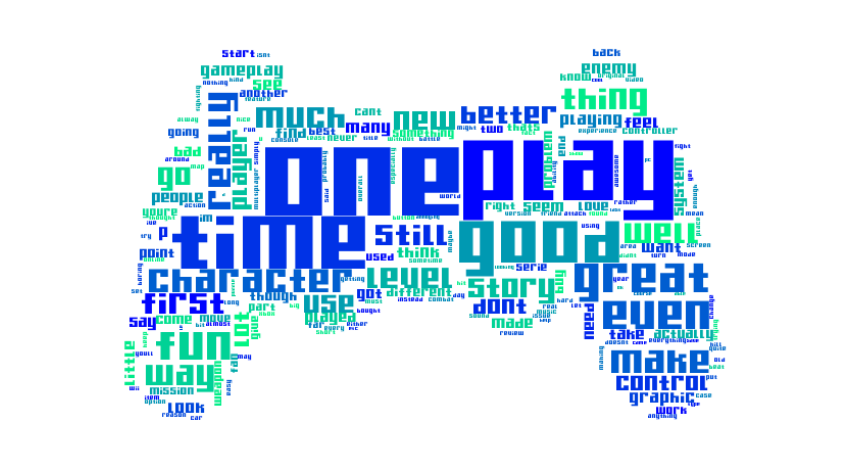

In [82]:
text = ' '.join(list(dfReview['reviewText_prep']))

wordcloud = WordCloud(background_color="white",
                      width=500, height=500,
                      mask=mask, 
                      font_path='Gamer.ttf',
                      colormap="winter",).generate(text)

plt.figure(figsize=(15,10))
p = plt.imshow(wordcloud, interpolation='bilinear')
p = plt.axis("off")

In [88]:
ret, maskP = cv.threshold(cv.imread('pos.png'),
                         55,
                         255,
                         cv.THRESH_BINARY)

ret, maskN = cv.threshold(cv.imread('neg.png'),
                         55,
                         255,
                         cv.THRESH_BINARY)

(-0.5, 224.5, 224.5, -0.5)

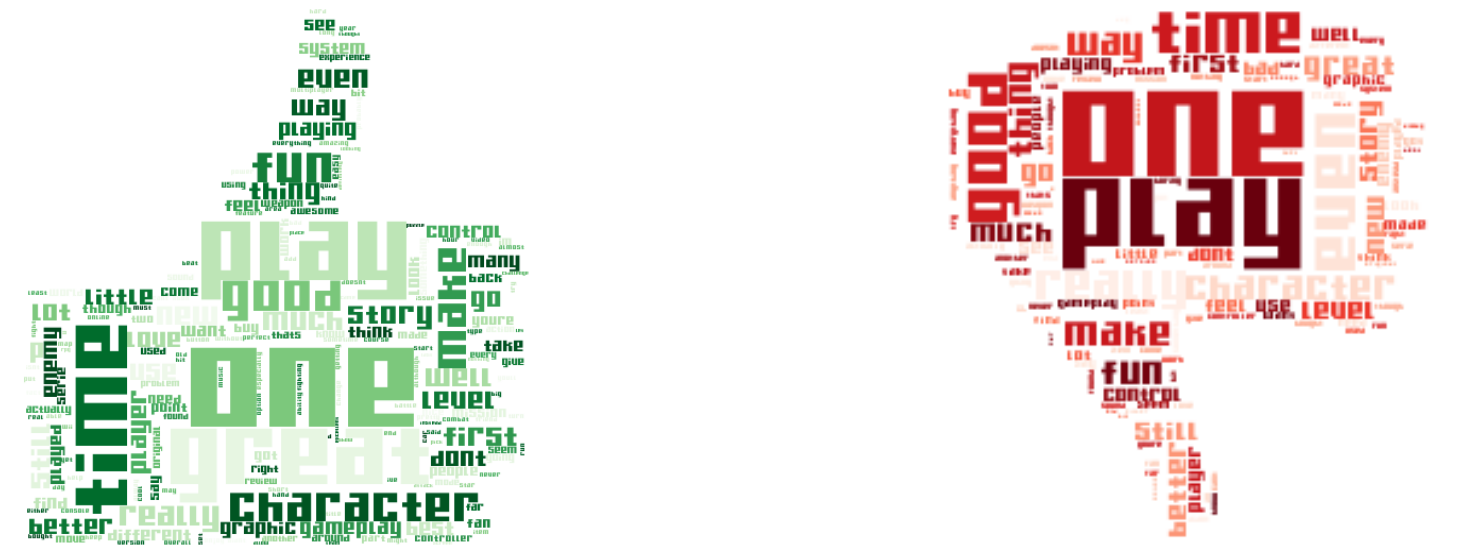

In [97]:
text = ' '.join(list(dfReview[dfReview['overallBinary'] == 1]['reviewText_prep']))

wordcloudP = WordCloud(background_color="white",
                      width=500, height=500,
                      mask=maskP, 
                      font_path='Gamer.ttf',
                      colormap="Greens",).generate(text)

text = ' '.join(list(dfReview[dfReview['overallBinary'] == 0]['reviewText_prep']))

wordcloudN = WordCloud(background_color="white",
                      width=500, height=500,
                      mask=maskN, 
                      font_path='Gamer.ttf',
                      colormap="Reds",).generate(text)

fig, ax = plt.subplots(1, 2, figsize=(30,10))
ax[0].imshow(wordcloudP, interpolation='bilinear')
ax[1].imshow(wordcloudN, interpolation='bilinear')

ax[0].axis("off")
ax[1].axis("off")

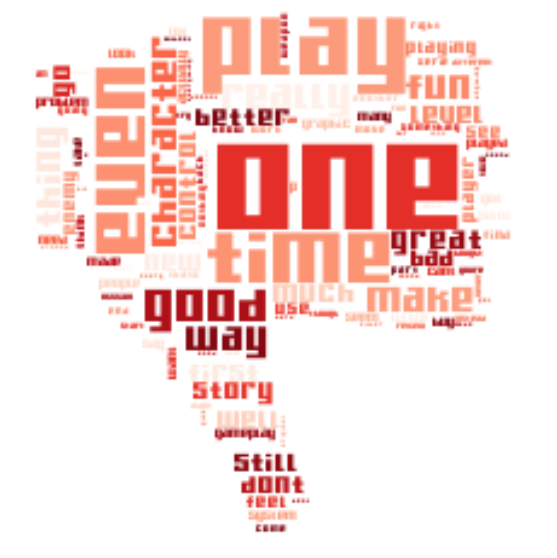

In [91]:
text = ' '.join(list(dfReview[dfReview['overallBinary'] == 0]['reviewText_prep']))

wordcloud = WordCloud(background_color="white",
                      width=500, height=500,
                      mask=maskN, 
                      font_path='Gamer.ttf',
                      colormap="Reds",).generate(text)

plt.figure(figsize=(15,10))
p = plt.imshow(wordcloud, interpolation='bilinear')
p = plt.axis("off")

## Modelagem

In [350]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score

def mostra_metricas(y_true, y_pred):
  ''' Função que recebe o y real, o y predito e mostra as
      principais metricas.
  '''
  print("Acurácia: ", accuracy_score(y_true, y_pred))
  print("\nAUROC:", roc_auc_score(y_true, y_pred))
  print("\nF1-Score:", f1_score(y_true, y_pred, average='weighted'))
  print("\nMatriz de confusão:")
  sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)
  plt.show()

### TF-IDF

In [372]:
tfidf_vect = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vect.fit_transform(dfReview['reviewText_prep'])

In [373]:
print(X_tfidf)

(0, 2362)     0.28510978103416845
  (0, 2710)     0.39014830600773676
  (0, 2665)     0.22375693851448133
  (0, 406)      0.15161913601846758
  (0, 2547)     0.16500577764486943
  (0, 3782)     0.16854459016161133
  (0, 2080)     0.28197278612779514
  (0, 867)      0.2308324290210661
  (0, 3210)     0.1176932074786112
  (0, 1881)     0.17253345715089757
  (0, 2310)     0.1856962955951335
  (0, 2990)     0.22675731049451012
  (0, 4957)     0.42673668334525566
  (0, 1229)     0.29125923259380826
  (0, 4825)     0.32948007487109954
  (1, 1753)     0.10889666072443233
  (1, 3215)     0.12648245018966606
  (1, 786)      0.15108221643471081
  (1, 460)      0.3218600711019063
  (1, 2755)     0.23794365370676562
  (1, 3970)     0.19320255713795778
  (1, 2960)     0.3046381309500056
  (1, 1617)     0.210456999720373
  (1, 813)      0.30820472530881105
  (1, 590)      0.14567537333806485
  :     :
  (7999, 4854)  0.05458097648689486
  (7999, 1859)  0.05672429945850727
  (7999, 2561)  0.058262246824933576
  (7999, 2087)  0.1756615006968512
  (7999, 665)   0.05958799672374421
  (7999, 4450)  0.0537620020845075
  (7999, 2367)  0.11152059114161057
  (7999, 3929)  0.15313178028710508
  (7999, 2302)  0.3398825088871534
  (7999, 2622)  0.12045700724954733
  (7999, 1281)  0.09985131797213392
  (7999, 4180)  0.07131608660112902
  (7999, 2348)  0.07304000983610084
  (7999, 4494)  0.04449468516297852
  (7999, 3038)  0.07822154563756212
  (7999, 1899)  0.05183131234923323
  (7999, 2518)  0.06082567560631498
  (7999, 1786)  0.06352682433817139
  (7999, 1628)  0.052624650739938376
  (7999, 1831)  0.12328096528238087
  (7999, 1164)  0.06614128219094213
  (7999, 3659)  0.0682858059803821
  (7999, 1753)  0.09453444233822542
  (7999, 1617)  0.09135006974680232
  (7999, 2990)  0.041404946485086434

### Modelos

In [374]:
dfReviewTest = pd.read_csv('video_games_reviews_test.csv')
dfReviewValid = pd.read_csv('video_games_reviews_dev.csv')

In [375]:
X_train = X_tfidf
y_train = dfReview['overallBinary']

X_test = tfidf_vect.transform(dfReviewTest['reviewText'].replace(np.nan, ''))
y_test = dfReviewTest['overall'].apply(lambda x:1 if x > 3 else 0)

#### Random Forest

In [400]:
rf = RandomForestClassifier(200)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [401]:
y_dt_pred = rf.predict(X_test)
#mostra_metricas(y_test, y_dt_pred)

Acurácia:  0.774

AUROC: 0.7423058179637128

F1-Score: 0.7665601808357932

Matriz de confusão:

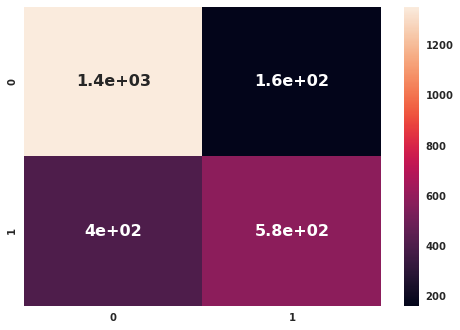

In [402]:
mostra_metricas(y_test, y_dt_pred)

##### Validacao

In [404]:
X_valid = tfidf_vect.transform(dfReviewValid['reviewText'].replace(np.nan, ''))
y_valid = dfReviewValid['overall'].apply(lambda x:1 if x > 3 else 0)
allScores = cross_val_score(rf, X_valid, y_valid , cv=10)

In [406]:
allScores.mean()

0.714

In [383]:
def testes(texto):
    yvect = tfidf_vect.transform([texto])
    ypred = rf.predict(yvect)
    if ypred == 0:
        print("Essa é uma review negativa.")
    else:
        print("Essa é uma review positiva.")

In [386]:
testes('good')

Essa é uma review positiva.

#### Regressao Logistica

In [389]:
reglog2 = LogisticRegression()
reglog2.fit(X_train, y_train)

y2_reglog_pred = reglog2.predict(X_test)

Acurácia:  0.784

AUROC: 0.764077662103978

F1-Score: 0.7813112732664768

Matriz de confusão:

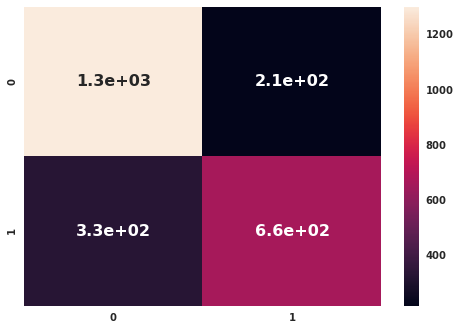

In [390]:
y2_reglog_pred = reglog2.predict(X_test)
mostra_metricas(y_test, y2_reglog_pred)

# criar uma lista de reviwes para testar os modelos e criar um barplot copm hue nos modelos

In [19]:
k, n = tuple([int(i) for i in input().split()])

 1 2


In [23]:
[0]*10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [24]:
n = [0, 0, 1, 5, 0, 2, 0, 0, 4, 0, 0, 3, 0, 0, 6, 7]

In [25]:
a = n.pop()

In [29]:
len(n)

16

In [28]:
n.insert(0, 25)

In [30]:
n

[25, 0, 0, 1, 5, 0, 2, 0, 0, 4, 0, 0, 3, 0, 0, 6]